# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="../assets/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="../assets/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

**Question:** 

What methods are best for identifying outliers?  

**Answer:**  

Check the descriptive statistics and understand the range of the data values. We can make use of visual inspection by plotting boxplots to identify the points outside of the whiskers which will be outlier

**Question:**  

How do you make the decision to keep or exclude outliers from any future models?  

**Answer:**  

There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make on a dataset-by-dataset basis, according to what your goals are for the model you are planning to construct. To help you make the decision, you can start with these general guidelines:

- Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
- Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
- Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

### **Task 1. Imports, links, and loading**
For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("../datasets/tiktok_dataset.csv")

<img src="../assets/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


**Answer:**  

The visualizations most helpful for considering the distribution of the data include box plots and histograms. Visualizing the distribution of the data can inform the next steps and considerations in data analysis. For example, data distribution will inform which types of modeling is needed.

- We can make use of box plots or histograms to understand the distribution of the data to help us find outliers in the dataset
- Pie charts can be useful to show proportion of claim and opinion tickets.  
- Bar chart could be used to show the engagement metrics for each author ban status or each claim status

<img src="../assets/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

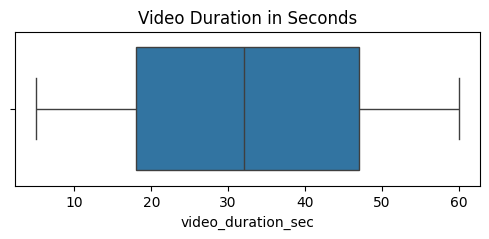

In [8]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6, 2))
sns.boxplot(x=data['video_duration_sec'])
plt.title('Video Duration in Seconds')
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

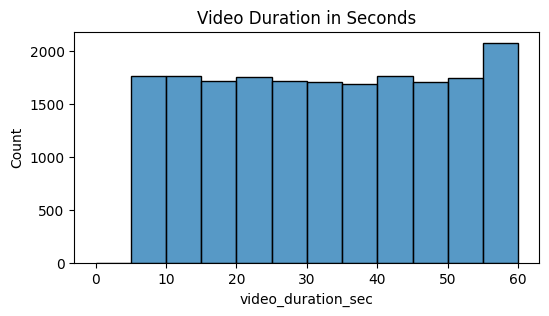

In [9]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video Duration in Seconds')
plt.show()

**Question:** 

What do you notice about the duration and distribution of the videos?

**Answer:** 

All videos are 5-60 seconds in length, and the distribution is approximately uniform.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

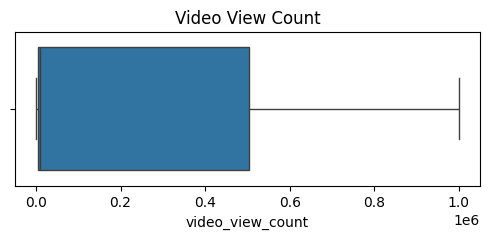

In [10]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6, 2))
sns.boxplot(x=data['video_view_count'])
plt.title('Video View Count')
plt.show()

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

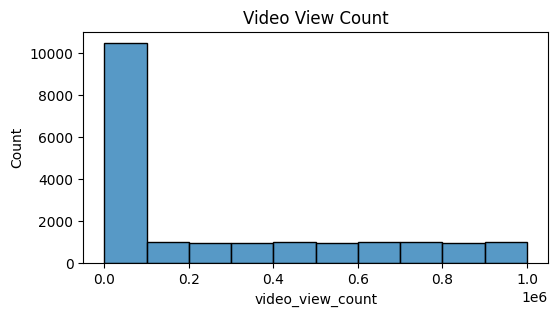

In [11]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video View Count')
plt.show()

**Question:** 

What do you notice about the distribution of this variable?

**Answer:** 

The data is not evenly distributed as videos with less than 100,000 views account for the majority of the videos. Videos with more than 100,000 views have a uniform distribution.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

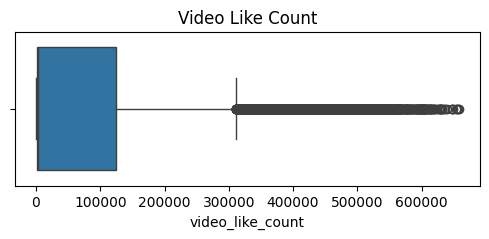

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6, 2))
sns.boxplot(x=data['video_like_count'])
plt.title('Video Like Count')
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

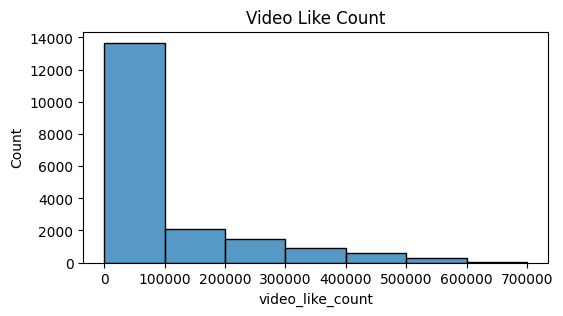

In [13]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
plt.title('Video Like Count')
plt.show()

**Question:** 

What do you notice about the distribution of this variable?

**Answer:** 

Similar to the video view counts, the data is not evenly distributed as videos with less than 100,000 likes account for the majority of the videos. However, the overall data seems to be right skewed with many videos at the upper extremity of like count.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

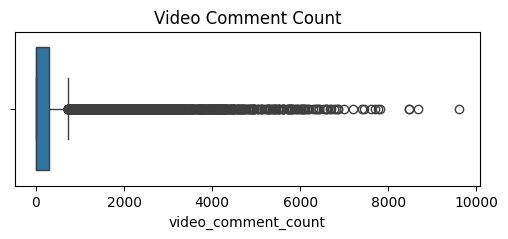

In [14]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6, 2))
sns.boxplot(x=data['video_comment_count'])
plt.title('Video Comment Count')
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

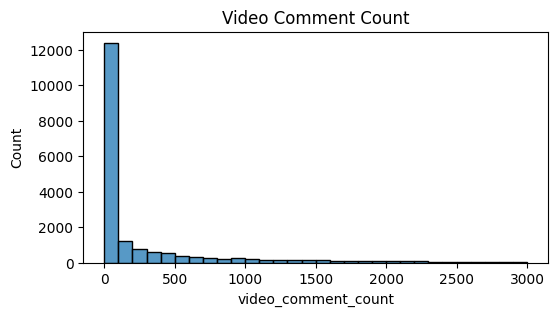

In [15]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video Comment Count')
plt.show()

**Question:** 

What do you notice about the distribution of this variable?

**Answer:** 

Most videos have less than 100 comments and the distribution is right-skewed.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

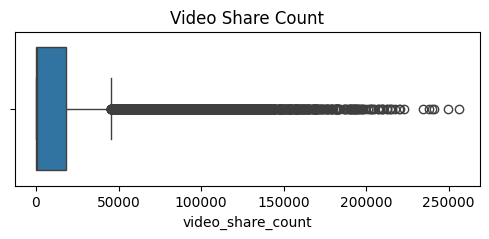

In [16]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(6, 2))
sns.boxplot(x=data['video_share_count'])
plt.title('Video Share Count')
plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

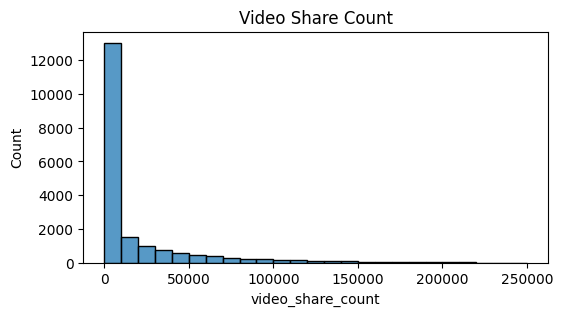

In [17]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(data['video_share_count'], bins=range(0,(250001),10000))
plt.title('Video Share Count')
plt.show()

**Question:** 

What do you notice about the distribution of this variable?

**Answer:** 

Most videos have less than 10,000 comments and the distribution is right-skewed.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

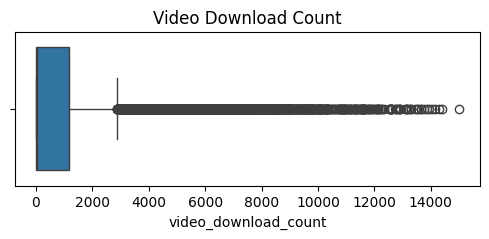

In [18]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(6, 2))
sns.boxplot(x=data['video_download_count'])
plt.title('Video Download Count')
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

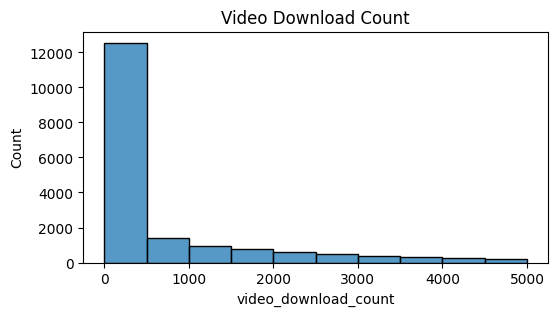

In [19]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(data['video_download_count'], bins=range(0,(5001),500))
plt.title('Video Download Count')
plt.show()

**Question:** 

What do you notice about the distribution of this variable?

**Answer:** 

Most videos have less than 500 downloads and the distribution is right-skewed.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

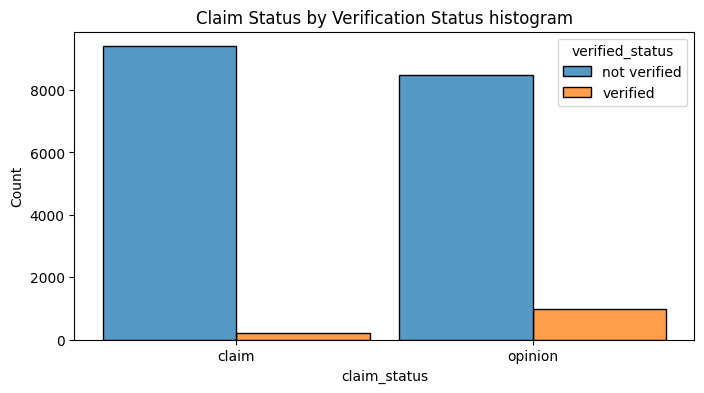

In [20]:
# Create a histogram
plt.figure(figsize=(8,4))
sns.histplot(data=data, x='claim_status', hue='verified_status', multiple='dodge', shrink=0.9)
plt.title('Claim Status by Verification Status histogram')
plt.show()

**Question:** 

What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

**Answer:** 

There are much more unverified users as compared to verified users. But if a user is verified, there is a higher chance that the video it post will be an opinion.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

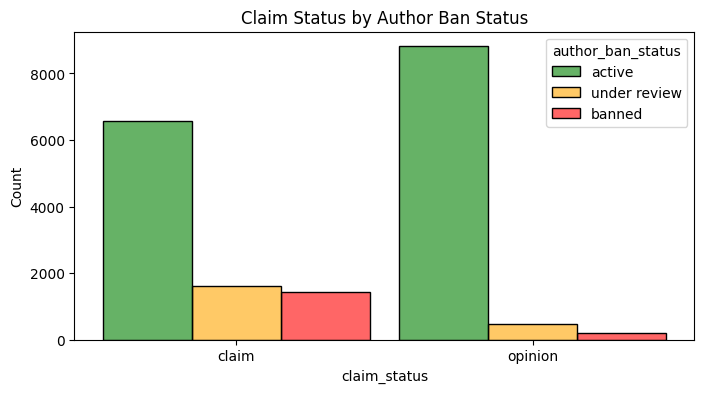

In [21]:
# Create a histogram
plt.figure(figsize=(8,4))
sns.histplot(data=data, x='claim_status', 
             hue='author_ban_status',
             multiple='dodge', 
             shrink=0.9, 
             hue_order=['active', 'under review', 'banned'], 
             palette=['green', 'orange', 'red'],
             alpha=0.6)
plt.title('Claim Status by Author Ban Status')
plt.show()

**Question:** 

What do you notice about the number of active authors compared to banned authors for both claims and opinions?

**Answer:** 

There are much more active authors as compared to banned authors for both claims and opinion. However, the proportion of active authors is far greater for opinion videos than for claim videos. This means authors posting claim videos have higher chance of being under review or banned aka non-active

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

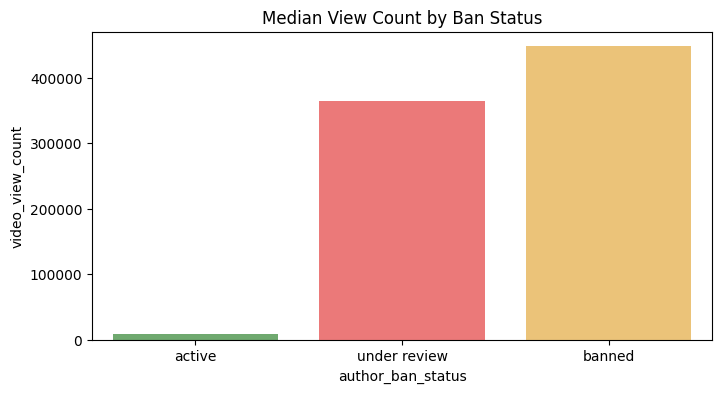

In [22]:
# Create a bar plot
ban_status_count = data.groupby('author_ban_status')['video_view_count'].median().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=ban_status_count, 
            x='author_ban_status', 
            y='video_view_count',
            hue='author_ban_status',
            order=['active', 'under review', 'banned'],
            palette=['green', 'orange', 'red'],
            alpha=0.6)
plt.title('Median View Count by Ban Status')
plt.show()

**Question:** 

What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

**Answer:** 

The median view count for non active authors is much higher compared to the active authors. Since we know that non-active users have a higher chance of posting claims video (from previous graph) and that non-active users have a higher video view count (based on this graph), then we `video_view_count` can be a good indicator of claim status. High video view count = higher chance of being an non-active user = higher chance of being posting claims video.

Indeed, a quick check of the median view count by claim status bears out this assessment:

In [23]:
# Calculate the median view count for claim status.
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

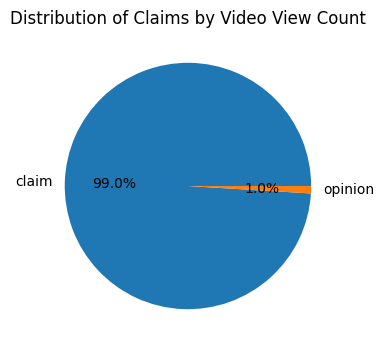

In [24]:
# Create a pie graph
claims_count = data.groupby('claim_status')['video_view_count'].sum().reset_index()
plt.figure(figsize=(4,4))
plt.pie(x=claims_count['video_view_count'], labels=['claim', 'opinion'], autopct='%1.1f%%')
plt.title('Distribution of Claims by Video View Count')
plt.show()

In [25]:
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

**Question:** 

What do you notice about the overall view count for claim status?

**Answer:** 

Almost all video views is for claim videos even though there is almost equal number of videos for claims and opinions

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [26]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for col in count_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    median = data[col].median()
    outlier_threshold = median + 1.5 * IQR
    num_outlier = (data[col] > outlier_threshold).sum()
    print(f"Number of outliers, {col}: {num_outlier}")



Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

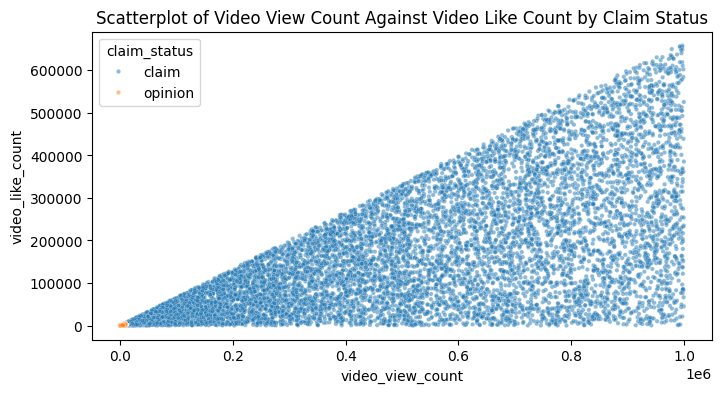

In [27]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(8,4))
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=0.5)
plt.title("Scatterplot of Video View Count Against Video Like Count by Claim Status")
plt.show()


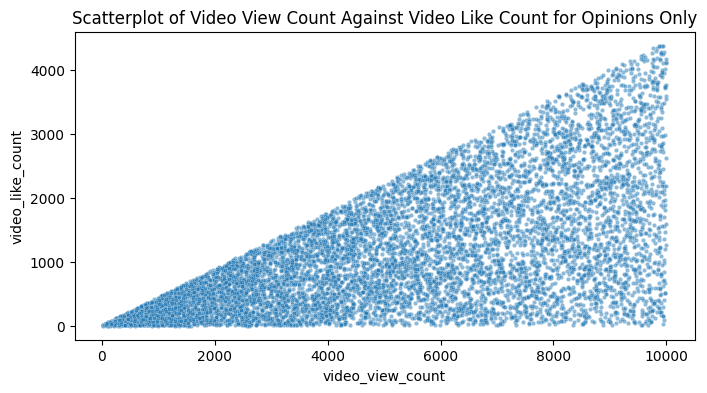

In [28]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
plt.figure(figsize=(8,4))
opinions_only = data[data['claim_status'] == 'opinion']
sns.scatterplot(x=opinions_only["video_view_count"], y=opinions_only["video_like_count"], s=10, alpha=0.5)
plt.title("Scatterplot of Video View Count Against Video Like Count for Opinions Only")
plt.show()

You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="../assets/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


I have learned ....
- how to examine the distribution of the data using histogram and boxplot
- how to identify outliers using visual inspection with boxplots and the median+1.5*IQR method
- how to create seaborn charts using hue parameter which introduces another dimension
- how to identify correlation and relationship between variables in particular claim_status with other variables to identify possible predictors, without using the correlation calculation.

My other questions are ....
- I want to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data.

My client would likely want to know ...
- the assumptions regarding what data might be predictive of claim_status.

### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

- it helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.
- it helps us to establish relationships between variables and allow us to identify possible predictors of our target variable

Visualizations helped me understand ..

- That we will need to make decisions on certain considerations prior to designing a model. (for example, what to do with outliers, duplicate values, or missing data)


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.